In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pre_processing as pp
import analysis as anl

category = 'kitchen_&_housewares'
vocabulary = []
Xx, Y, vocabulary = pp.bow(category, clear = True, stem = False, hand_neg = True, 
                           pos_t = True, lemm = False, rm_stop = True, rm_not_alpha = True)

In [2]:
#Apenas para teste
from sklearn.decomposition import PCA

print (Xx.shape)

pca = PCA (n_components = 10)

X = pca.fit_transform (Xx)

print (X.shape)

(2000, 7385)
(2000, 10)


In [3]:
def normalizar(X):
    m, n = X.shape
    
    X_norm = np.zeros( (m,n) )
    
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0, ddof=1)
    
    for i in range(m):
        X_norm[i,:] = (X[i,:]-mu) / sigma
        
    return X_norm, mu, sigma

In [4]:
# semente usada na randomizacao dos dados.
randomSeed = 10 

# gera os indices aleatorios que irao definir a ordem dos dados
idx_perm = np.random.RandomState(randomSeed).permutation(range(len(Y)))

# ordena os dados de acordo com os indices gerados aleatoriamente
X2, Y2 = X[idx_perm, :], Y[idx_perm]

#X2, Y2 = X[idx_perm, :], Y[idx_perm]

pTrain = 0.8

train_index, test_index = anl.stratified_holdOut(Y, pTrain)

Xtrain, Xval = X2[train_index, :], X2[test_index, :]
Ytrain, Yval = Y2[train_index], Y2[test_index]

In [5]:
# alpha = 0.25
# Xtrain, new_vocabulary, selected = pp.select_c2(Xtrain, Ytrain, vocabulary, alpha)
# Xtrain, mu, sigma = normalizar(Xtrain) 
# print(new_vocabulary)
# Xval = Xval[:, selected]

# print("Número de features antes do chi-quadrado: " + str(len(vocabulary)))
# print("----------------------------------------")
# print("Número de features após chi-quadrado: " + str(len(new_vocabulary)))
# print(new_vocabulary)

In [6]:
def distancia(x, X):
               
    m = X.shape[0] 
    D = np.zeros(m) 

    for i in range (m):
        D[i] = np.linalg.norm(X[i] - x)
    return D

In [7]:
def knn(x, X, Y, K):
        
    y = 0 
    
    ind_viz = np.ones(K, dtype=int)
    
    D = distancia(x, X)
    
    votos = np.zeros(len(set(Y)))

    ind_viz = np.argsort(D)[:K]
            
    for indice in ind_viz:
        votos[Y[indice]] += 1 / D[indice]
            
    y = np.argmax(votos)
        
    return y

In [8]:
def predicao(K, Xtrain, Ytrain, Xval, Yval):
    
    Ypred = []

    for i in range(Xval.shape[0]):
        y = knn(Xval[i], Xtrain, Ytrain, K)
        Ypred.append(y)
        
    acuracia = np.sum(Ypred==Yval)/len(Yval)
    
    return Ypred, acuracia


classes = np.unique(Y)

melhorK = 1
melhorAcc = 0

for k in [1, 3, 5, 7, 9, 11, 13]:
    print("K = " + str(k))
    Ypred, acuracia = predicao(k, Xtrain, Ytrain, Xval, Yval)
    auxResults = anl.relatorioDesempenho(Yval, Ypred, classes, imprimeRelatorio=True)
    
    if (acuracia > melhorAcc):
        melhorAcc = acuracia
        melhorL = k

K = 1


/home/antonio/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  



	Revocacao   Precisao   F-medida   Classe
	0.883       0.896      0.889      0
	0.892       0.879      0.885      1
	------------------------------------------------
	0.888       0.887      0.888      Média macro
	0.887       0.887      0.887      Média micro

	Acuracia: 0.887
K = 3

	Revocacao   Precisao   F-medida   Classe
	0.873       0.909      0.891      0
	0.908       0.872      0.889      1
	------------------------------------------------
	0.890       0.890      0.890      Média macro
	0.890       0.890      0.890      Média micro

	Acuracia: 0.890
K = 5

	Revocacao   Precisao   F-medida   Classe
	0.888       0.910      0.899      0
	0.908       0.885      0.896      1
	------------------------------------------------
	0.898       0.897      0.898      Média macro
	0.897       0.897      0.897      Média micro

	Acuracia: 0.897
K = 7

	Revocacao   Precisao   F-medida   Classe
	0.878       0.909      0.893      0
	0.908       0.876      0.892      1
	---------------------------

In [9]:
def curva_aprendizado(X, Y, Xval, Yval, k, num_exec = 5):
    # inicializa as listas que guardarao a performance no treinamento e na validacao
    perf_train = []
    perf_val = []

    classes = np.unique(Y)
    
    for i in range(10, len(Y), int (len(Y)/num_exec)):
        Ypred, acuracia = predicao(k, X[:i], Y[:i], X[:i], Y[:i])
        perf_train.append(acuracia)

        Ypred, acuracia = predicao(k, X[:i], Y[:i], Xval, Yval)
        perf_val.append(acuracia)


    ##################################################################################
       
    # Define o tamanho da figura 
    plt.figure(figsize=(20,12))

    # Plota os dados
    plt.plot(perf_train, color='blue', linestyle='-', linewidth=1.5, label='Treino') 
    plt.plot(perf_val, color='red', linestyle='-', linewidth=1.5, label='Validação')

    # Define os nomes do eixo x e do eixo y
    plt.xlabel(r'# Qtd. de dados de treinamento',fontsize='x-large') 
    plt.ylabel(r'Acuracia',fontsize='x-large') 

    # Define o título do gráfico
    plt.title(r'Curva de aprendizado', fontsize='x-large')

    # Acrescenta um grid no gráfico
    plt.grid(axis='both')

    # Plota a legenda
    plt.legend()
    
    plt.show()

/home/antonio/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  


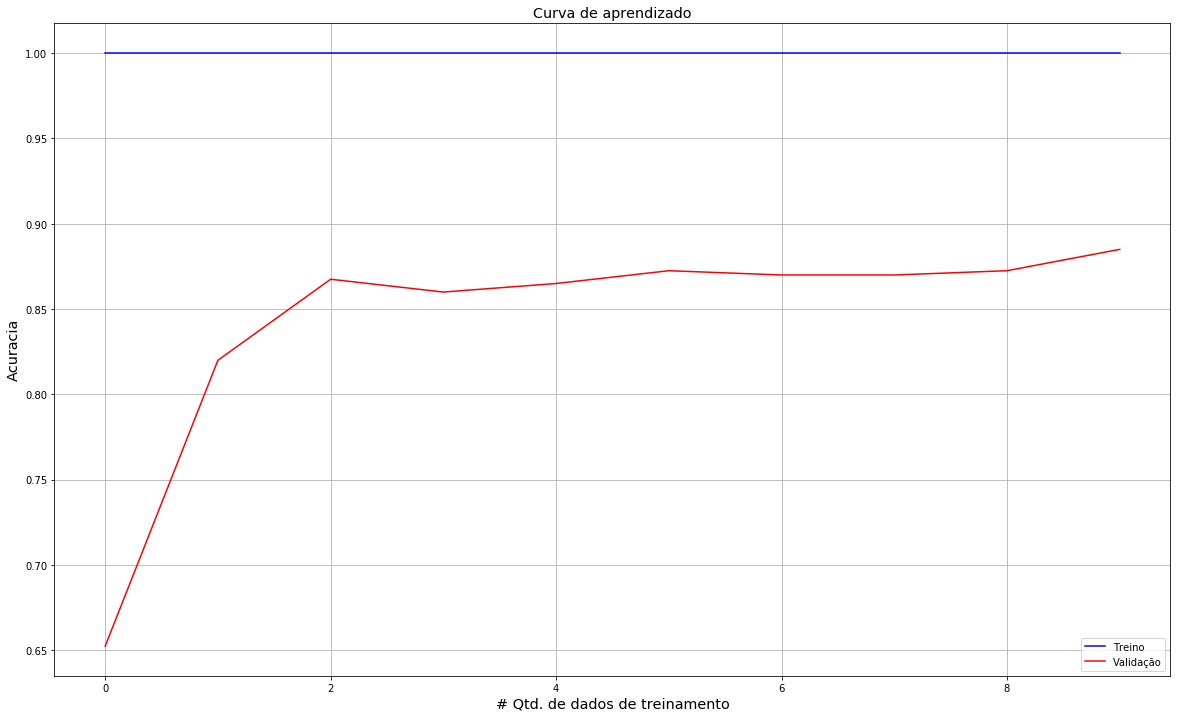

In [10]:
passo = 5 #número de execuções da curva
curva_aprendizado(Xtrain, Ytrain, Xval, Yval, melhorK, passo)